In [ ]:
# Simple Regression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
df=pd.read_csv("FuelConsumption.csv")

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
# Plot each of the features
cdf=df[["ENGINESIZE", "CYLINDERS","FUELCONSUMPTION_COMB", "CO2EMISSIONS" ]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


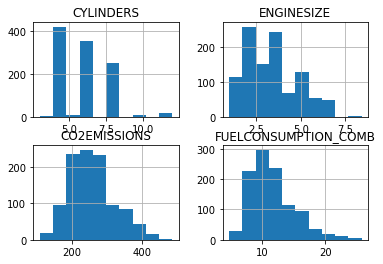

In [17]:
viz=cdf[["CYLINDERS", "ENGINESIZE", "CO2EMISSIONS", "FUELCONSUMPTION_COMB"]]
viz.hist()
plt.show()

In [18]:
# PLot each of the features aga(inst "EMISSIONS"

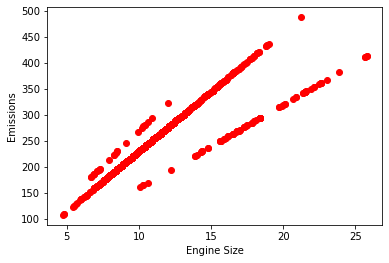

In [26]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="red")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

# Practise
#Plot CYLINDER vs the Emission, to see how linear is their relationship is

<function matplotlib.pyplot.show(close=None, block=None)>

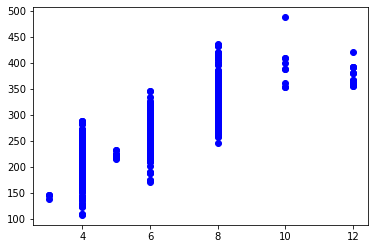

In [28]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="blue")
plt.xlabel=("Cylinder")
plt.ylabel=("Emissions")
plt.show

# Creating train and test dataset

In [29]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

TypeError: 'str' object is not callable

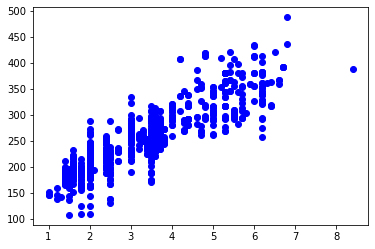

In [33]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


In [32]:
# Modelling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.82316092]]
Intercept:  [125.6672685]


TypeError: 'str' object is not callable

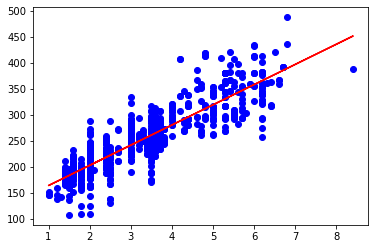

In [34]:
# Plot Ouputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluating the Model

In [35]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.66
Residual sum of squares (MSE): 968.19
R2-score: 0.76


In [36]:
# Lets see what the evaluation metrics are if we trained a regression
# model using the FUELCONSUMPTION_COMB feature.
# Start by selecting FUELCONSUMPTION_COMB as the train_x data from the train dataframe,
# then select FUELCONSUMPTION_COMB as the test_x data from the test dataframe

In [37]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

In [38]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

In [41]:
# Find the predictions using the model's predict function and the test_x data
predictions = regr.predict(test_x)

In [40]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 20.97
